# Compiling the Data

This notebook is NEW CONTINUING: I am piping in data objects created from other notebooks and combining them.

## Table of Contents
- [1st Section](#Loading-in-the-data) is where I import the files
- [2nd section](#Data-overview) is where I briefly review the data
- [3rd section](#Compiling-the-data) is where I compile the data frames together
- [4th section](#Pickling-the-data) is where the data are saved
- [Conclusion](#Conclusion) summarizes the notebook

## Loading in the data

In [1]:
# loading packages
import numpy as np
import pandas as pd
import nltk
import pickle

import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
# load in the data frames

f1 = open('../dataframe_notebooks/characters_update_df.pkl', 'rb')
characters_df = pickle.load(f1)
f1.close()

f2 = open('../dataframe_notebooks/conversations_df.pkl', 'rb')
conversations_df = pickle.load(f2)
f2.close()

f3 = open('../dataframe_notebooks/movies_df.pkl', 'rb')
movies_df = pickle.load(f3)
f3.close

f4 = open('../dataframe_notebooks/utterances_df.pkl', 'rb')
utterances_df = pickle.load(f4)
f4.close

<function BufferedReader.close>

Let's make sure they all look okay.

In [3]:
characters_df.head()

,character_ID,character_name,movie_ID,movie_title,gender
0,u0,BIANCA,m0,10 things i hate about you,F
2,u2,CAMERON,m0,10 things i hate about you,M
4,u4,JOEY,m0,10 things i hate about you,M
5,u5,KAT,m0,10 things i hate about you,F
6,u6,MANDELLA,m0,10 things i hate about you,F


The notebook where I worked with the character data can be found [here](../dataframe_notebooks/Characters_Notebook.ipynb).

In [4]:
conversations_df.head()

,conversation_ID,character1_ID,character2_ID,movie_ID,dialogue
0,0,u0,u2,m0,L194
0,0,u0,u2,m0,L195
0,0,u0,u2,m0,L196
0,0,u0,u2,m0,L197
1,1,u0,u2,m0,L198


The notebook where I worked with the conversation data can be found [here](../dataframe_notebooks/Conversations_Notebook.ipynb).

In [5]:
movies_df.head()

,movie_ID,movie_title,movie_year,genres,movie_decade
0,m0,10 things i hate about you,1999,"['comedy', 'romance']",1990
1,m1,1492: conquest of paradise,1992,"['adventure', 'biography', 'drama', 'history']",1990
2,m2,15 minutes,2001,"['action', 'crime', 'drama', 'thriller']",2000
3,m3,2001: a space odyssey,1968,"['adventure', 'mystery', 'sci-fi']",1960
4,m4,48 hrs.,1982,"['action', 'comedy', 'crime', 'drama', 'thrill...",1980


The notebook where I worked with the movie data can be found [here](../dataframe_notebooks/Movies_Notebook.ipynb).

In [6]:
utterances_df.head()

,line_ID,character_ID,movie_ID,character_name,utterance,sents,tokens,sent_count,token_count,avg_sent_length
0,L1045,u0,m0,BIANCA,They do not!,[They do not!],"[They, do, not, !]",1,4,4.0
1,L1044,u2,m0,CAMERON,They do to!,[They do to!],"[They, do, to, !]",1,4,4.0
2,L985,u0,m0,BIANCA,I hope so.,[I hope so.],"[I, hope, so, .]",1,4,4.0
3,L984,u2,m0,CAMERON,She okay?,[She okay?],"[She, okay, ?]",1,3,3.0
4,L925,u0,m0,BIANCA,Let's go.,[Let's go.],"[Let, 's, go, .]",1,4,4.0


The notebook where I worked with the utterance data can be found [here](../dataframe_notebooks/Utterances_Notebook.ipynb).

#### Data relations

The `characters_ID` gets referenced in the `conversations_df` and `utterances_df`. `movie_ID` is found in the `movies_df` and gets referenced in `conversations_df`, `characters_df`, and `utterances_df`. The `line_id` is from the `utterances_df` and creates the `dialogue` column in the `conversations_df`.

The dataframes all look good I will review some basic information about the data and then compile the data.

## Data overview

Let's review some basic information about the corpus before diving in.

In [7]:
# how many movies in the corpus?
movies_df.movie_title.count()

617

In [8]:
# what's the earliest year represented?
movies_df.movie_year.min()

1927

In [9]:
# what's the latest year represented?
movies_df.movie_year.max()

2010

In [10]:
# how many characters are in the corpus?
characters_df.character_name.count()

9033

In [11]:
# how many utterances/turns?
utterances_df.line_ID.count()

304403

In [12]:
# how many tokens?
utterances_df.token_count.sum()

4181316

## Compiling the data

### Discourse

In [13]:
# because I am looking at discourse, I will use the utterances data frame and load other data into it

# adding gender
discourse_df = pd.merge(utterances_df, characters_df)

# adding movie year and decade
discourse_df = pd.merge(discourse_df, movies_df)

# adding conversation data
discourse_df = pd.merge(discourse_df, conversations_df, left_on='line_ID', right_on='dialogue').drop(columns=['character1_ID', 'character2_ID', 'movie_ID_y', 'dialogue'], axis=1)

# rename column
discourse_df.rename(columns={"movie_ID_x": "movie_ID"}, inplace=True)

# rearrange columns
discourse_df = discourse_df[['conversation_ID', 'line_ID','character_ID', 'character_name', 'gender', 'movie_ID', 'movie_title', 'genres', 'movie_year', 'movie_decade', 'utterance', 'sents', 'tokens', 'sent_count', 'token_count', 'avg_sent_length']]

In [14]:
discourse_df.head()

,conversation_ID,line_ID,character_ID,character_name,gender,movie_ID,movie_title,genres,movie_year,movie_decade,utterance,sents,tokens,sent_count,token_count,avg_sent_length
0,24,L1045,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,They do not!,[They do not!],"[They, do, not, !]",1,4,4.000000
1,23,L985,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I hope so.,[I hope so.],"[I, hope, so, .]",1,4,4.000000
2,22,L925,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Let's go.,[Let's go.],"[Let, 's, go, .]",1,4,4.000000
3,21,L872,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,Okay -- you're gonna need to learn how to lie.,[Okay -- you're gonna need to learn how to lie.],"[Okay, --, you, 're, gon, na, need, to, learn,...",1,13,13.000000
4,21,L870,u0,BIANCA,F,m0,10 things i hate about you,"['comedy', 'romance']",1999,1990,I'm kidding. You know how sometimes you just ...,"[I'm kidding., You know how sometimes you just...","[I, 'm, kidding, ., You, know, how, sometimes,...",3,25,8.333333


In [15]:
discourse_df.describe()

,conversation_ID,movie_year,movie_decade,sent_count,token_count,avg_sent_length
count,304403.000000,304403.000000,304403.000000,304403.000000,304403.000000,304403.000000
mean,41482.442111,1988.106428,1983.434822,1.695433,13.736120,7.856031
std,23872.389444,17.141863,17.204418,1.252371,14.712649,5.155597
min,0.000000,1927.000000,1920.000000,1.000000,1.000000,1.000000
25%,20784.000000,1984.000000,1980.000000,1.000000,5.000000,4.500000
50%,41575.000000,1995.000000,1990.000000,1.000000,9.000000,7.000000
75%,62115.000000,1999.000000,1990.000000,2.000000,17.000000,10.000000
max,83096.000000,2010.000000,2010.000000,45.000000,684.000000,122.000000


### Gender/Movie Analysis

In [16]:
# it may be interesting to see character/gender information by year/decade

gender_df = pd.merge(characters_df, movies_df)

In [17]:
gender_df.head()

,character_ID,character_name,movie_ID,movie_title,gender,movie_year,genres,movie_decade
0,u0,BIANCA,m0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
1,u2,CAMERON,m0,10 things i hate about you,M,1999,"['comedy', 'romance']",1990
2,u4,JOEY,m0,10 things i hate about you,M,1999,"['comedy', 'romance']",1990
3,u5,KAT,m0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990
4,u6,MANDELLA,m0,10 things i hate about you,F,1999,"['comedy', 'romance']",1990


In [18]:
gender_df.groupby(['movie_decade', 'gender']).count()

character_ID  character_name  movie_ID  movie_title  \
movie_decade gender                                                         
1920         A                   2               2         2            2   
             F                   5               5         5            5   
             M                   3               3         3            3   
             unknown             3               3         3            3   
1930         A                  26              26        26           26   
             F                  57              57        57           57   
             M                 121             121       121          121   
             unknown            61              61        61           61   
1940         A                  23              23        23           23   
             F                  63              63        63           63   
             M                 108             108       108          108   
             unknown            51              51        51           51   
1950         A                  19              19        19           19   
             F                  59              59        59           59   
             M                  94              94        94           94   
             unknown            63              63        63           63   
1960         A                  17              17        17           17   
             F                  61              61        61           61   
             M                 109             109       109          109   
             unknown            84              84        84           84   
1970         A                  93              93        93           93   
             F                 173             173       173          173   
             M                 345             345       345          345   
             unknown           238             238       238          238   
1980         A                 152             152       152          152   
             F                 348             348       348          348   
             M                 628             628       628          628   
             unknown           395             395       395          395   
1990         A                 404             404       404          404   
             F                 817             817       817          817   
             M                1565            1565      1565         1565   
             unknown           797             797       797          797   
2000         A                 233             233       233          233   
             F                 512             512       512          512   
             M                 820             820       820          820   
             unknown           466             466       466          466   
2010         A                   7               7         7            7   
             F                   4               4         4            4   
             M                   6               6         6            6   
             unknown             1               1         1            1   

                      movie_year  genres  
movie_decade gender                       
1920         A                 2       2  
             F                 5       5  
             M                 3       3  
             unknown           3       3  
1930         A                26      26  
             F                57      57  
             M               121     121  
             unknown          61      61  
1940         A                23      23  
             F                63      63  
             M               108     108  
             unknown          51      51  
1950         A                19      19  
             F                59      59  
             M                94      94  
             unknown          63      63  
1960         

This is hard to read, so let's visualize it.

/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/opt/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: 
The savefig.jpeg_quality rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


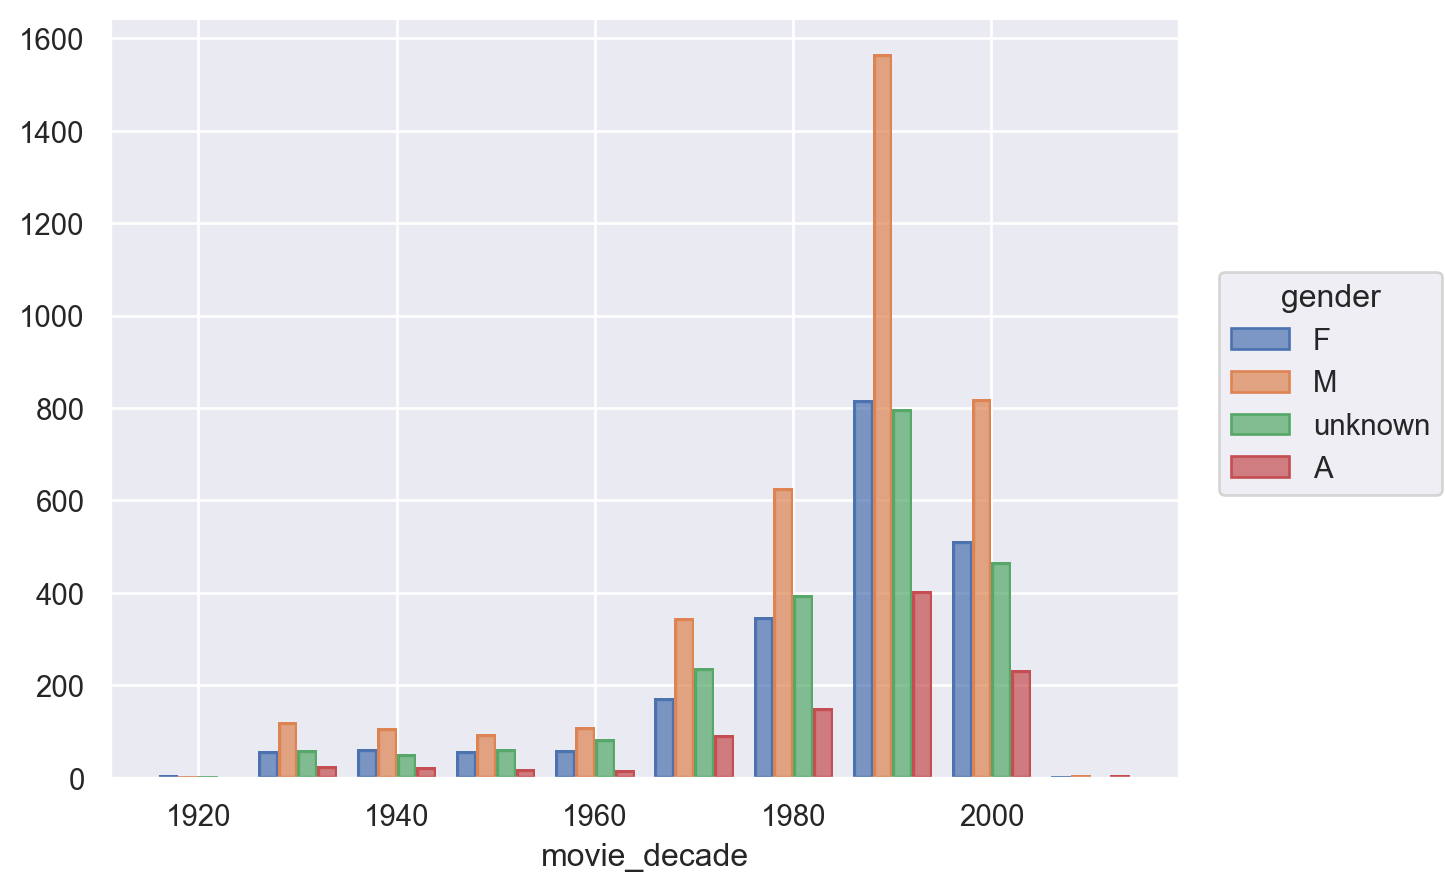

In [19]:
so.Plot(gender_df, x = "movie_decade", color="gender").add(so.Bar(), so.Count(), so.Dodge()).save('../data_visualization/gender_decade.png')

Aside from the 1920s, which only had two movies, all other decades have more male characters than female characters. This makes sense based on the gender marker work that was done [here](../dataframe_notebooks/Characters_Notebook.ipynb).

In [20]:
gender_df[gender_df.movie_decade==1920]

,character_ID,character_name,movie_ID,movie_title,gender,movie_year,genres,movie_decade
2068,u2074,KATIE,m134,metropolis,F,1927,"['adventure', 'drama', 'sci-fi']",1920
2069,u2068,CHRISTOPH,m134,metropolis,M,1927,"['adventure', 'drama', 'sci-fi']",1920
2070,u2071,EMMA,m134,metropolis,F,1927,"['adventure', 'drama', 'sci-fi']",1920
2071,u2072,GENA,m134,metropolis,F,1927,"['adventure', 'drama', 'sci-fi']",1920
2072,u2075,KID,m134,metropolis,A,1927,"['adventure', 'drama', 'sci-fi']",1920
2073,u2076,LAWYER,m134,metropolis,A,1927,"['adventure', 'drama', 'sci-fi']",1920
2074,u2078,TANNER,m134,metropolis,M,1927,"['adventure', 'drama', 'sci-fi']",1920
2075,u2069,DEX,m134,metropolis,unknown,1927,"['adventure', 'drama', 'sci-fi']",1920
2076,u2070,DIGITAL GENA,m134,metropolis,F,1927,"['adventure', 'drama', 'sci-fi']",1920
2077,u2073,HALDEN,m134,metropolis,unknown,1927,"['adventure', 'drama', 'sci-fi']",1920


In [21]:
gender_df[gender_df.movie_decade==2010]

,character_ID,character_name,movie_ID,movie_title,gender,movie_year,genres,movie_decade
2751,u2768,ELAINE,m181,simone,F,2010,"['short', 'drama', 'horror', 'thriller']",2010
2752,u2784,VIKTOR,m181,simone,M,2010,"['short', 'drama', 'horror', 'thriller']",2010
2753,u2767,DETECTIVE,m181,simone,A,2010,"['short', 'drama', 'horror', 'thriller']",2010
2754,u2769,FAITH,m181,simone,F,2010,"['short', 'drama', 'horror', 'thriller']",2010
2755,u2771,HAL,m181,simone,M,2010,"['short', 'drama', 'horror', 'thriller']",2010
2756,u2772,HANK,m181,simone,M,2010,"['short', 'drama', 'horror', 'thriller']",2010
2757,u2773,HARRY,m181,simone,M,2010,"['short', 'drama', 'horror', 'thriller']",2010
2758,u2774,KENT,m181,simone,M,2010,"['short', 'drama', 'horror', 'thriller']",2010
2759,u2775,LAINEY,m181,simone,F,2010,"['short', 'drama', 'horror', 'thriller']",2010
2760,u2776,LAWYER,m181,simone,A,2010,"['short', 'drama', 'horror', 'thriller']",2010


In the 2010 movie ambiguous characters were the most prominent.

## Pickling the data

In [22]:
# pickle the data to use in other notebooks for further analysis
f = open('discourse_df.pkl', 'wb')
pickle.dump(discourse_df, f, -1)
f.close()

## Conclusion

The `discourse_df` will be the primary data object that I work with on the remaining notebooks. I will be able to look at conversation-specific data as well as turn information. By adding character and movie information I can look at gender information as well as change over time. 